In [1]:
import yfinance as yf

In [2]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [3]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [5]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512
2004-08-26,2.613952,2.688672,2.606729,2.687676,2.684621,142572401
2004-08-27,2.692408,2.705360,2.632383,2.643840,2.640835,124826132


In [6]:
google_data.shape

(5036, 6)

In [7]:
(4908, 6)
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5036.000000,5036.000000,5036.000000,5036.000000,5036.000000,5.036000e+03
mean,45.698287,46.182028,45.243315,45.721785,45.671923,1.151800e+08
std,43.853648,44.342653,43.428397,43.892511,43.848921,1.491856e+08
min,2.470490,2.534002,2.464263,2.490913,2.488082,1.584340e+05
25%,13.058740,13.157495,12.908864,13.072190,13.057332,2.722841e+07
50%,27.065692,27.285337,26.861752,27.060890,27.030130,5.488245e+07
75%,60.469250,61.219999,60.150688,60.726751,60.657726,1.418567e+08
max,191.750000,193.309998,190.619995,192.660004,192.660004,1.650833e+09


In [8]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5036 entries, 2004-08-23 to 2024-08-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5036 non-null   float64
 1   High       5036 non-null   float64
 2   Low        5036 non-null   float64
 3   Close      5036 non-null   float64
 4   Adj Close  5036 non-null   float64
 5   Volume     5036 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.4 KB


In [9]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

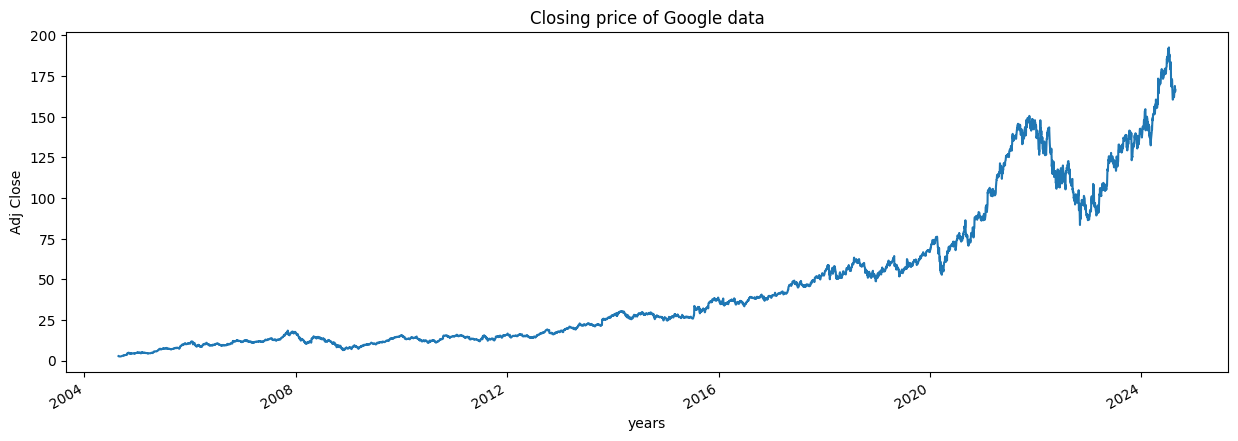

In [12]:
plt.figure(figsize = (15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")

In [13]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")
    

In [14]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

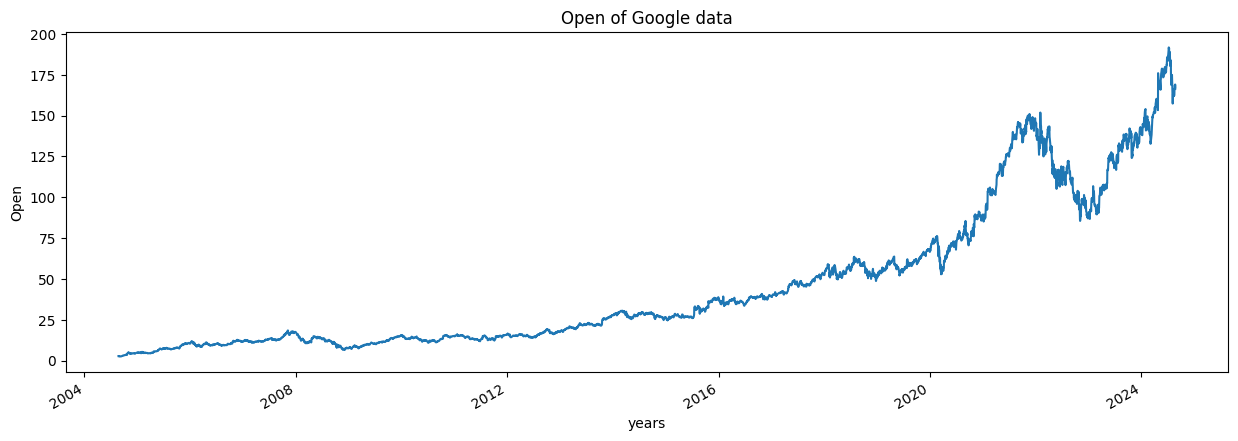

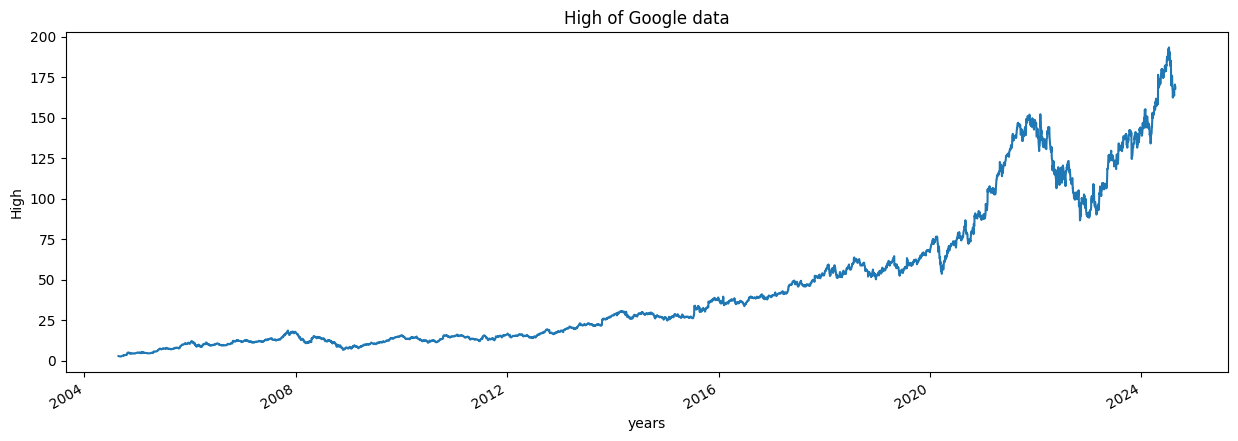

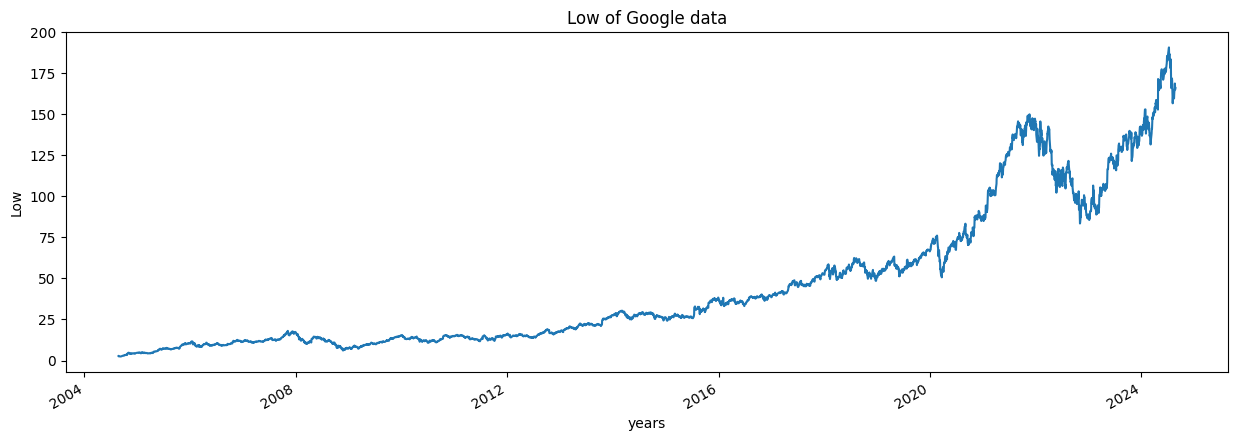

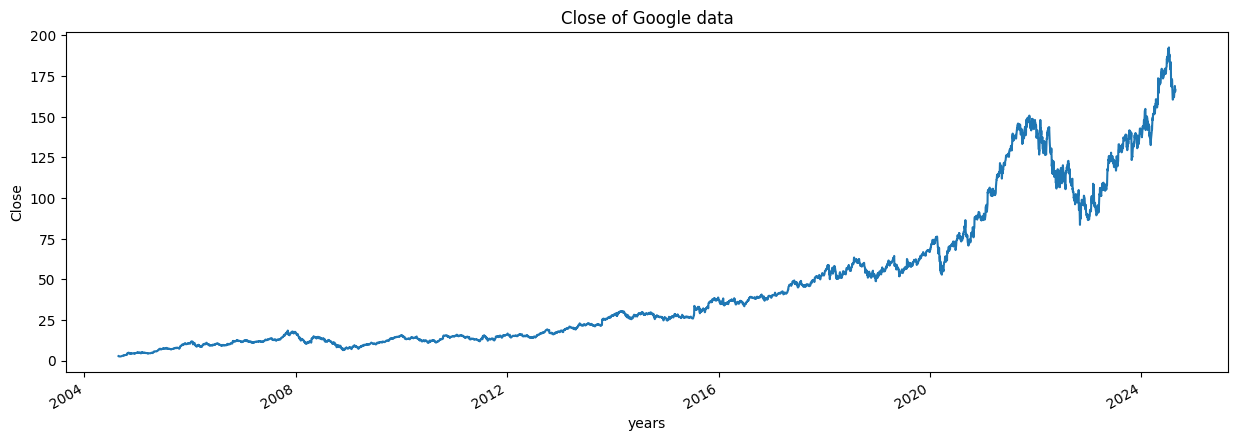

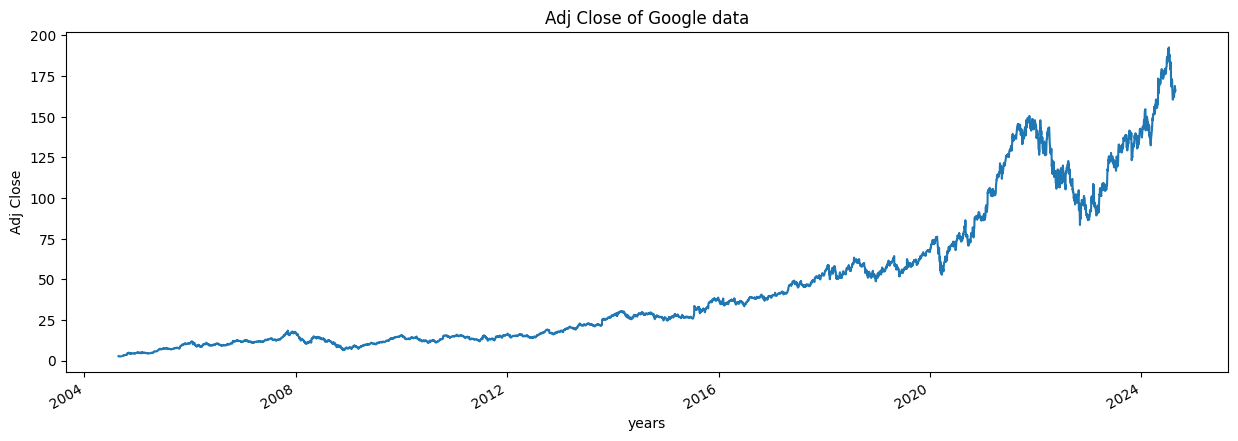

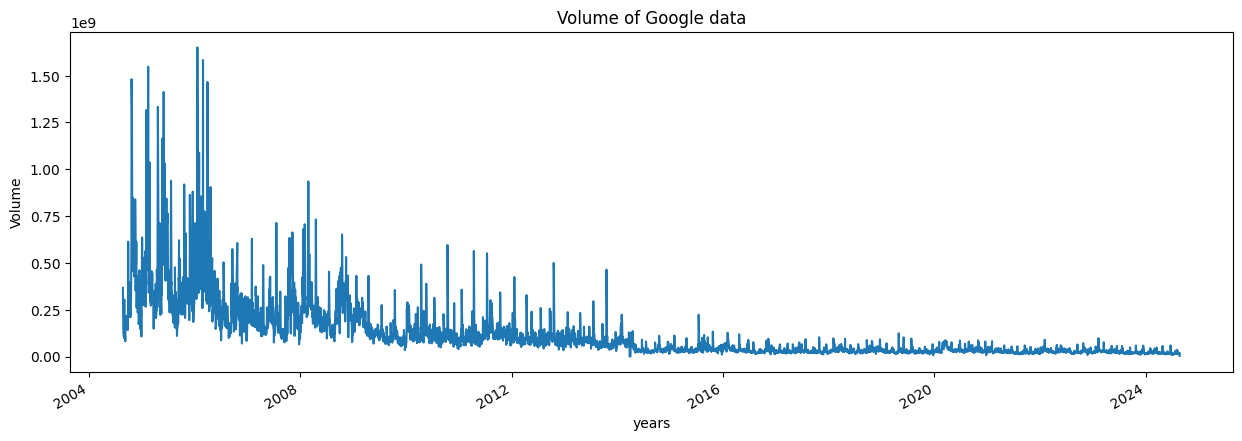

In [15]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [16]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [17]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [18]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [19]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 92
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 163


In [20]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [21]:
google_data['MA_for_250_days'][0:250].tail()

Date
2005-08-11         NaN
2005-08-12         NaN
2005-08-15         NaN
2005-08-16         NaN
2005-08-17    5.064351
Name: MA_for_250_days, dtype: float64

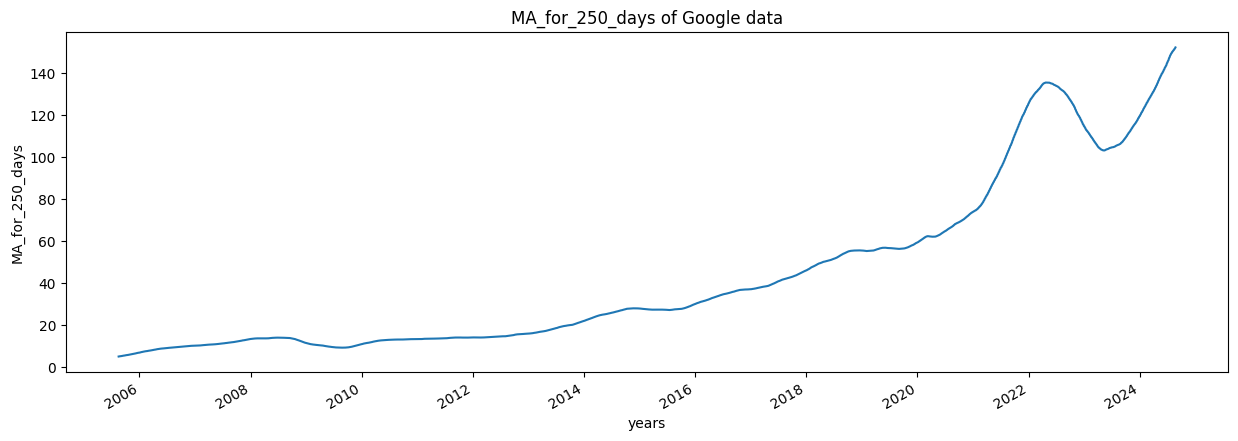

In [22]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

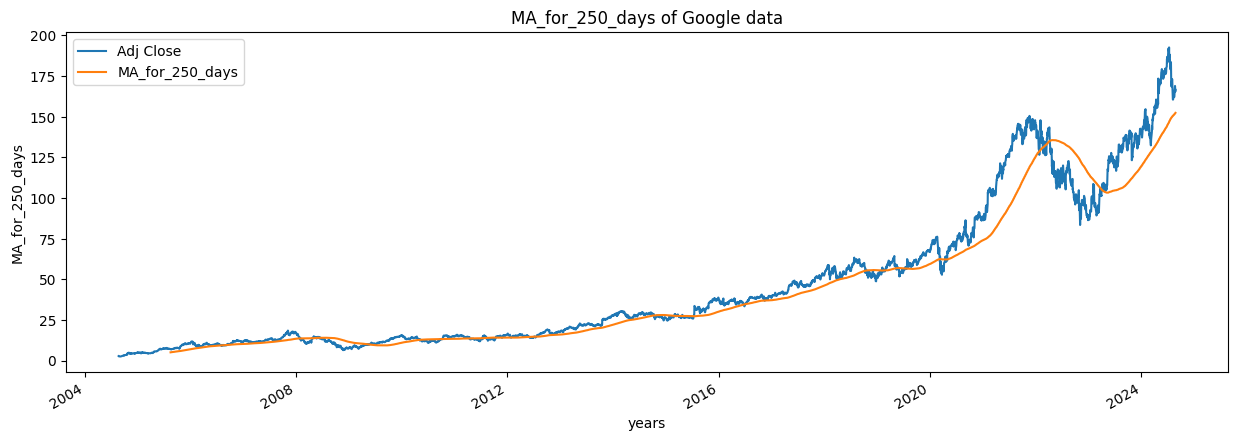

In [23]:
plot_graph((15,5), google_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

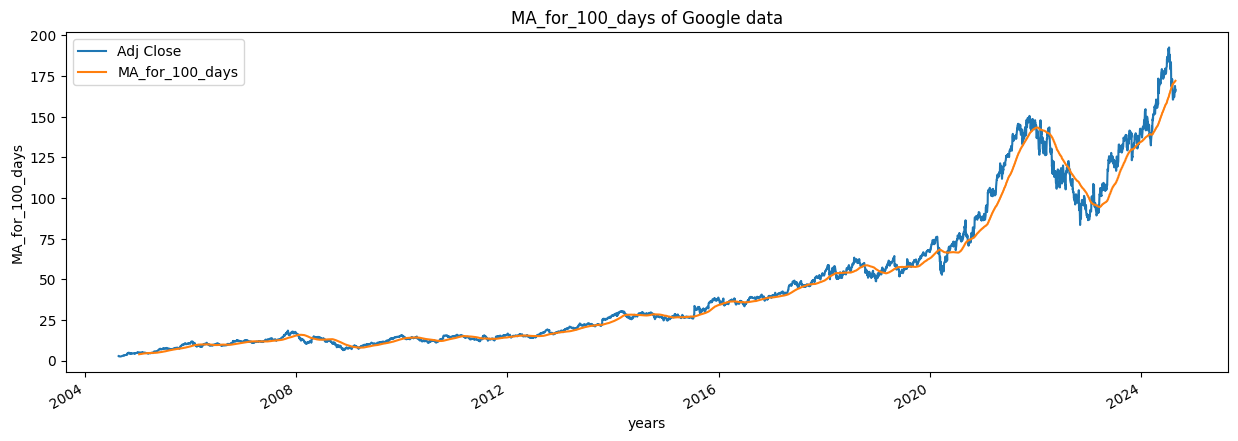

In [24]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

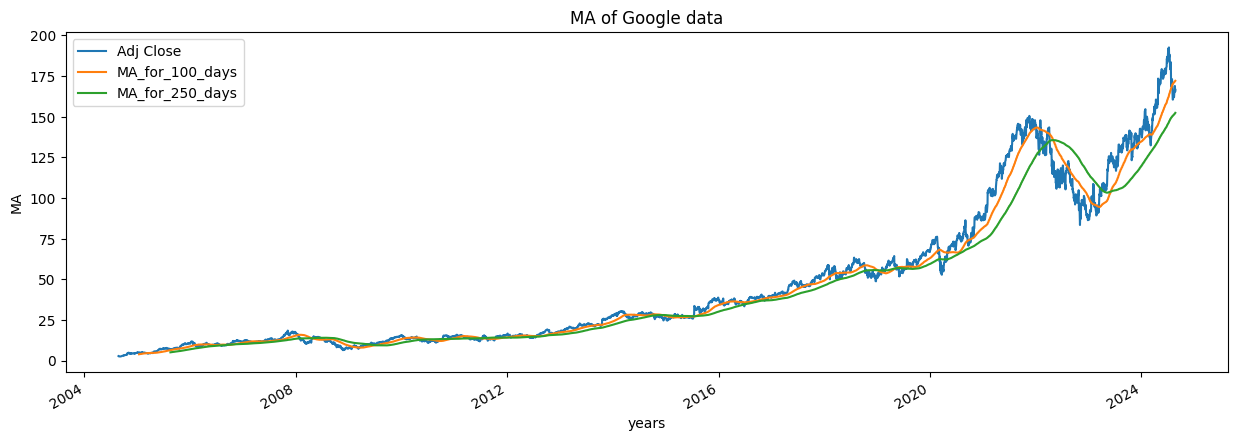

In [25]:
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [26]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2004-08-23,2.721690,NaN
2004-08-24,2.608991,-0.041408
2004-08-25,2.637103,0.010775
2004-08-26,2.684621,0.018019
2004-08-27,2.640835,-0.016310


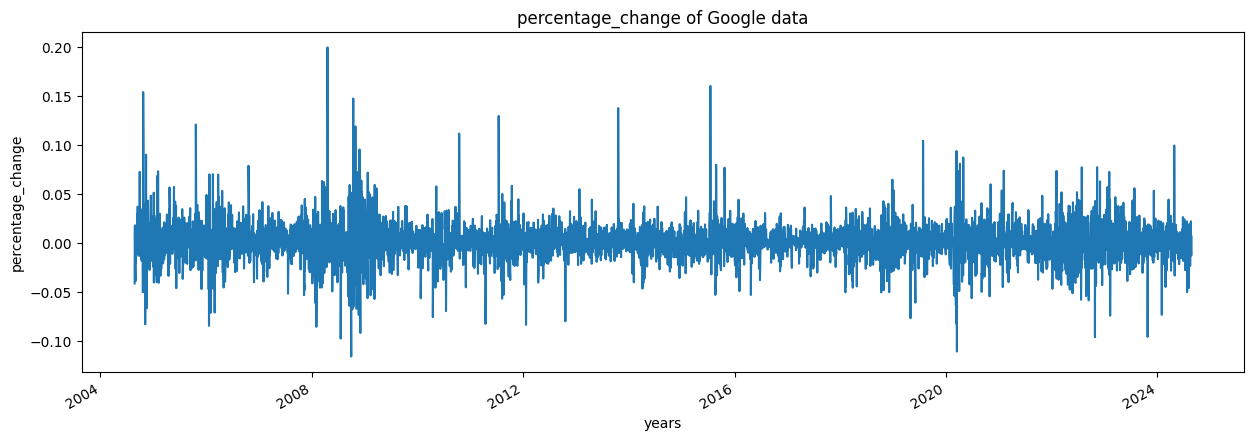

In [27]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [28]:
Adj_close_price = google_data[['Adj Close']]

In [29]:
max(Adj_close_price.values),min(Adj_close_price.values) 

(array([192.66000366]), array([2.48808169]))

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[1.22840556e-03],
       [6.35788989e-04],
       [7.83614035e-04],
       ...,
       [8.68382259e-01],
       [8.57129287e-01],
       [8.62860923e-01]])

In [31]:
len(scaled_data)

5036

In [32]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [33]:
x_data[0],y_data[0]

(array([[1.22840556e-03],
        [6.35788989e-04],
        [7.83614035e-04],
        [1.03348276e-03],
        [8.03236951e-04],
        [2.61643473e-04],
        [3.08737468e-04],
        [3.13989218e-05],
        [1.96230411e-04],
        [0.00000000e+00],
        [2.05389945e-04],
        [2.99582949e-04],
        [3.00889305e-04],
        [6.95966599e-04],
        [9.79844446e-04],
        [1.50182002e-03],
        [1.56853693e-03],
        [1.82625131e-03],
        [2.28674167e-03],
        [2.53137368e-03],
        [2.33252680e-03],
        [2.40316654e-03],
        [2.72237366e-03],
        [2.59285890e-03],
        [2.38747397e-03],
        [3.51252574e-03],
        [4.06458761e-03],
        [3.87097242e-03],
        [4.26081802e-03],
        [4.58524931e-03],
        [5.01826483e-03],
        [4.84950926e-03],
        [5.08105766e-03],
        [4.93454147e-03],
        [4.61141654e-03],
        [4.89137156e-03],
        [5.34924043e-03],
        [5.49314139e-03],
        [5.7

In [34]:

int(len(x_data)*0.7)

3455

In [35]:
4986-100-int(len(x_data)*0.7)

1431

In [36]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [37]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3455, 100, 1)
(3455, 1)
(1481, 100, 1)
(1481, 1)


In [38]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [39]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\musta\OneDrive\Desktop\asd\sm\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
 349/3455 ━━━━━━━━━━━━━━━━━━━━ 1:50 36ms/step - loss: 0.0011

In [ ]:
model.summary()

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions

In [ ]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

In [ ]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

In [ ]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [ ]:
rmse

In [ ]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

In [ ]:
plot_graph((15,6), ploting_data, 'test data')

In [ ]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [ ]:
model.save("Latest_stock_price_model.keras")